## Phases in Diabetes Prediction Model will be:-

- Business Understanding
- Data Preprocessing
- Data Manipulation
- Train & Test Split
- Modelling
- Evaluation
- Deployment

## Data Understanding

- we will import the required libraries first.
- we will read the dataset & study different attributes provided.

In [1]:
import pandas as pd  #for data manipulation
import numpy as np #for calculation & array usage
from sklearn.preprocessing import StandardScaler #for standardizing the dataset
from sklearn.model_selection import train_test_split #for dividing the dataset into train and test datasets
from sklearn import svm #for creating the support vector Machine model to predict -> Is the patient diabetic
from sklearn.metrics import accuracy_score #for checking the accuracy of the created model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/kaggle/input/diabetes-data-set/diabetes.csv" #filepath to read using pandas 

df =pd.read_csv("diabetes.csv")
 #reading the dataset

In [3]:
df.shape #number of rows & columns in the imported dataset

(768, 9)

In [4]:
df.head() #shows the first 5 rows to check the dataset format

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe() #statistical measure of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#value counts of the diabetic patients

df['Outcome'].value_counts() #0 -> Non Diabetic & 1-> Diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
#Separating the outcome label from the other features

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [9]:
print(X.shape,y.shape)

(768, 8) (768,)


## Data Preprocessing & Manipulation

- We will standardize the dataset to better traint the Model.

```
Data Standardization -> this is used when our dataset's column has very high covariance between them so it is difficult to train the model for this  simplicity we will be standardizing the dataset.
```



In [10]:
scaler = StandardScaler()
#Standardize features by removing the mean and scaling to unit variance
scaler.fit(X)

StandardScaler()

In [11]:
standardized_X = scaler.transform(X)

In [12]:
standardized_X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Modelling

### Train & Test split of the dataset for Model training & evaluation

In [13]:
X_train,X_test,y_train,y_test = train_test_split(standardized_X,y,test_size=0.2,stratify=y,random_state=2)

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(614, 8) (154, 8) (614,) (154,)


### Model Creation & Training

In [15]:
classifier = svm.SVC(kernel='linear')

In [16]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation

- Check the Accuracy of training dataset
- check the Accuracy of Test dataset

In [17]:
y_hat = classifier.predict(X_train)

training_score = accuracy_score(y_train, y_hat)

print("The Accuracy Score on the Training dataset is: ",training_score)

The Accuracy Score on the Training dataset is:  0.7866449511400652


In [18]:
y_hat = classifier.predict(X_test)

test_score = accuracy_score(y_test, y_hat)

print("The Accuracy Score on the Test dataset is: ",test_score)

The Accuracy Score on the Test dataset is:  0.7727272727272727


## Making a Prediction Model instance wise

In [19]:
input_data = (4,100,92,0,0,37.6,0.991,46)

input_array = np.asarray(input_data)
reshaped_input_array = input_array.reshape(1,-1)

x_check = scaler.transform(reshaped_input_array)
y_check = classifier.predict(x_check)

if y_check[0]==0:
  print("The Person is Non_diabetic")
else:
  print("The Person is Diabetic")

The Person is Non_diabetic


In [20]:
#An alternative approach with Logistic Regression

X_train,X_test,y_train,y_test = train_test_split(standardized_X,y,test_size=0.2,stratify=y,random_state=2)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)



LogisticRegression()

In [21]:
print(accuracy_score(model.predict(X_test),y_test))

0.7597402597402597


In [22]:
model.coef_

array([[ 0.39306705,  1.19059778, -0.23684195,  0.05317435, -0.24386462,
         0.7742931 ,  0.37345411,  0.17586024]])

In [23]:
predictions=model.predict(X_test)

<AxesSubplot:>

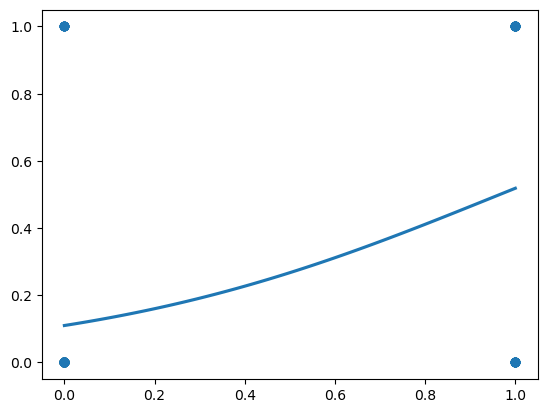

In [27]:
sns.regplot(y_test,predictions,x='Y_test (true values)',y='predicted values',data=df, logistic=True, ci=None)




In [31]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

